#**Machine Learning Capstone Project - Credit Card Fraud Detection**

##**Project Title:** ***Credit Card Fraud Detection***

##**Problem Statement:**

With the increasing prevalence of online transactions, ensuring the security of credit card
transactions is very important. The objective of this project is to develop a robust machine
learning model capable of accurately detecting fraudulent credit card transactions in real-time.
Utilizing a dataset containing transaction details such as transaction amount, merchant
category, cardholder information, transaction location, the aim is to build a predictive model
that can effectively differentiate between legitimate and fraudulent transactions. By employing
advanced machine learning algorithms and feature engineering techniques, the goal is to create
a system that enhances fraud detection capabilities, thereby minimizing financial losses for both
cardholders and financial institutions while maintaining a low false positive rate. Ultimately, this
project seeks to contribute to the development of proactive measures for securing credit card
transactions and safeguarding the financial interests of stakeholders in the digital economy.

##**Dataset Download:**
https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv



In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv')
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [ ]:
df.tail()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,No
4999,D501WH15,Visa,Healthcare,34672.0,2023-12-30 11:41:36,Jaipur,North,60.0,NaN,58261.0,39412.26,50000.0,Mobile,Saturday,No


In [ ]:
df.shape

(5000, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [ ]:
df['Is_Fraudulent'].unique()

array(['No', 'Yes'], dtype=object)

#**Project Steps and Objectives:**

#**1) Exploratory Data Analysis (EDA):**

**a)** Analyze the distribution of categorical features such as **Card_Type, Merchant_Category,**
**Location, etc.**

In [ ]:
categorical_cols = df.select_dtypes('O').columns.to_list()
# Remove individual elements instead of a list
for col in ['Transaction_ID', 'Transaction_DateTime']:
    categorical_cols.remove(col)
print(categorical_cols)
print()
print(len(categorical_cols))

['Card_Type', 'Merchant_Category', 'Location', 'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Is_Fraudulent']

8


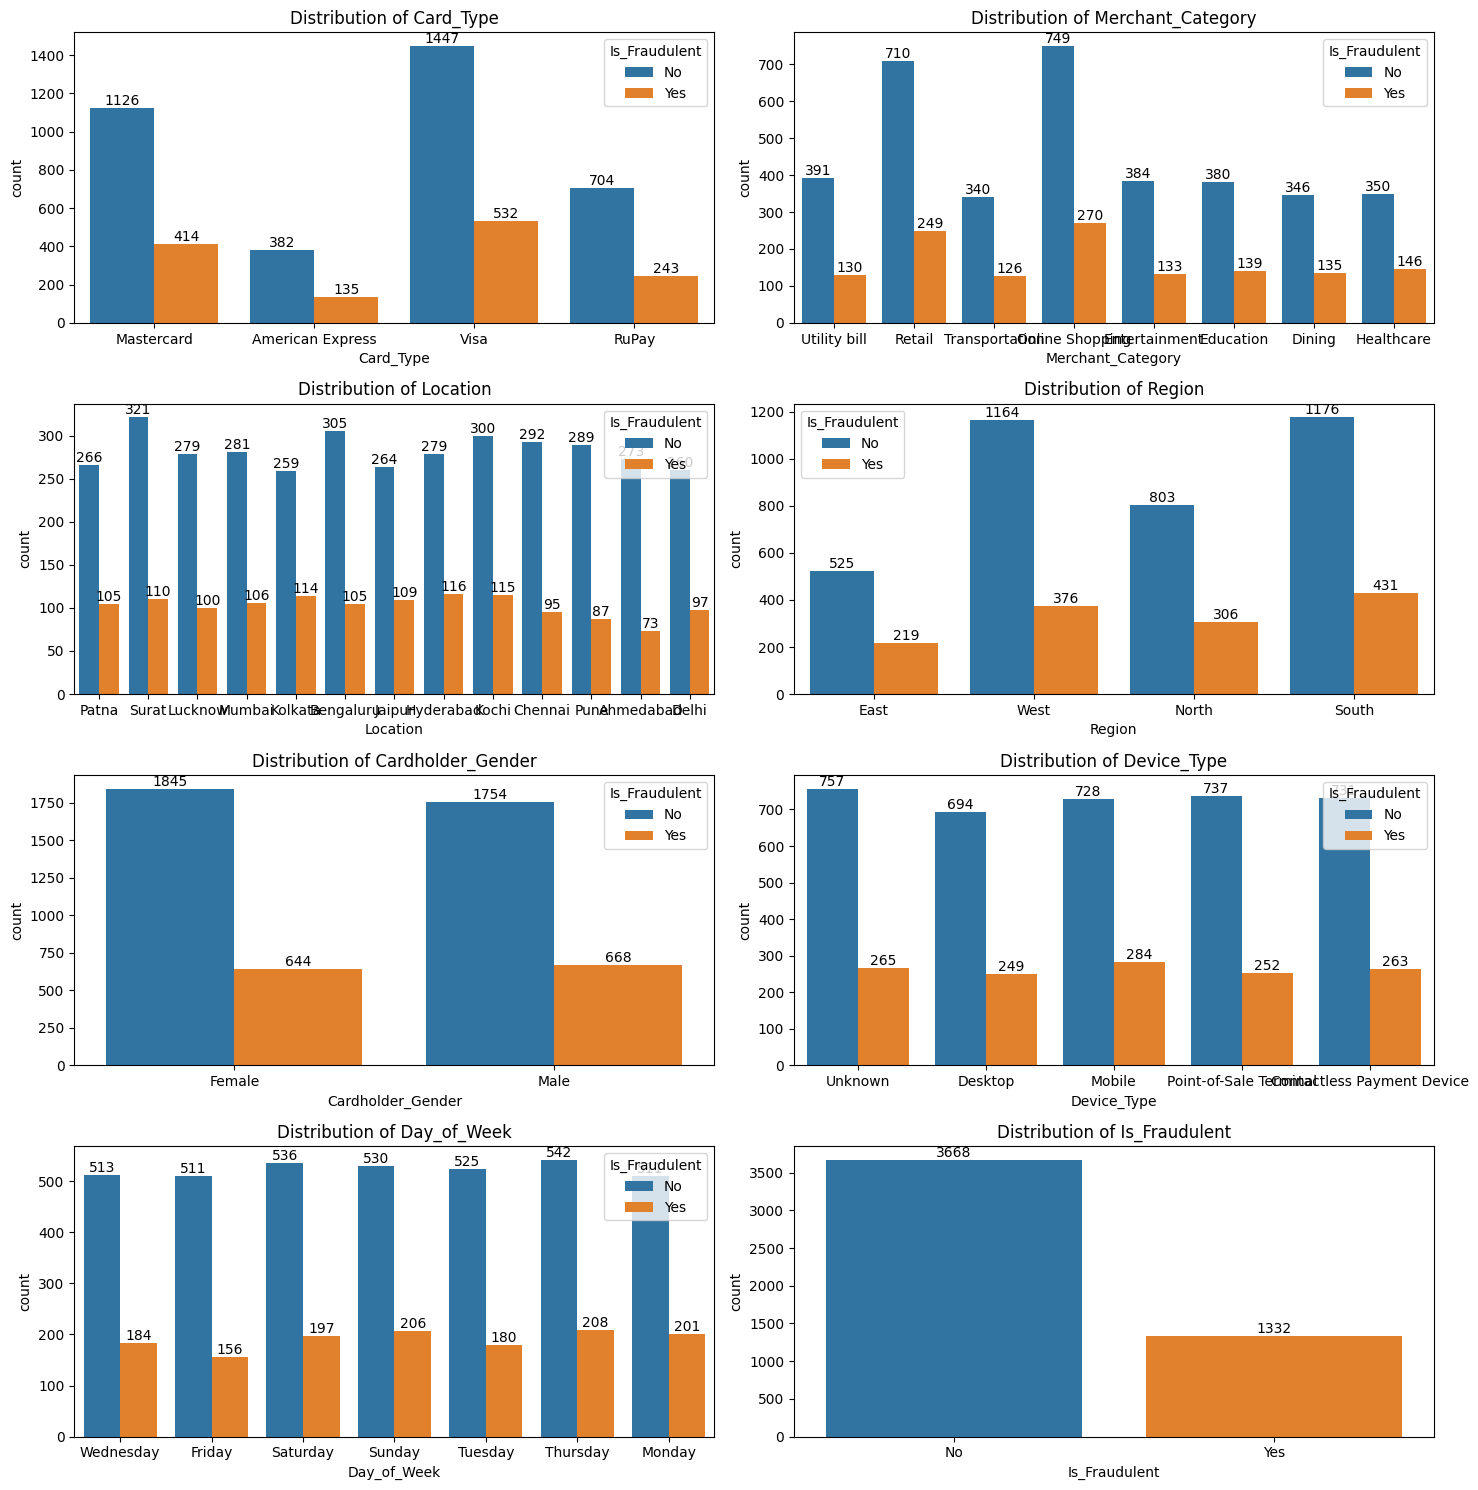

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15)) # 4X2 = 8
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='Is_Fraudulent', data=df, ax=axes[i]).set_title(f'Distribution of {col}')
    for container in axes[i].containers:
        axes[i].bar_label(container)

plt.tight_layout()
plt.show()

**b)** Explore numerical features like **Transaction_Amount, Cardholder_Age,**
**Cardholder_Monthly_Income, and** **Cardholder_Average_Spend**. Use descriptive statistics to
understand their central tendency and spread.

In [ ]:
numerical_cols = df.select_dtypes(exclude='O').columns.to_list()
numerical_cols.remove('Credit_Limit')
numerical_cols
print(numerical_cols)
print()
print(len(numerical_cols))

['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend']

4


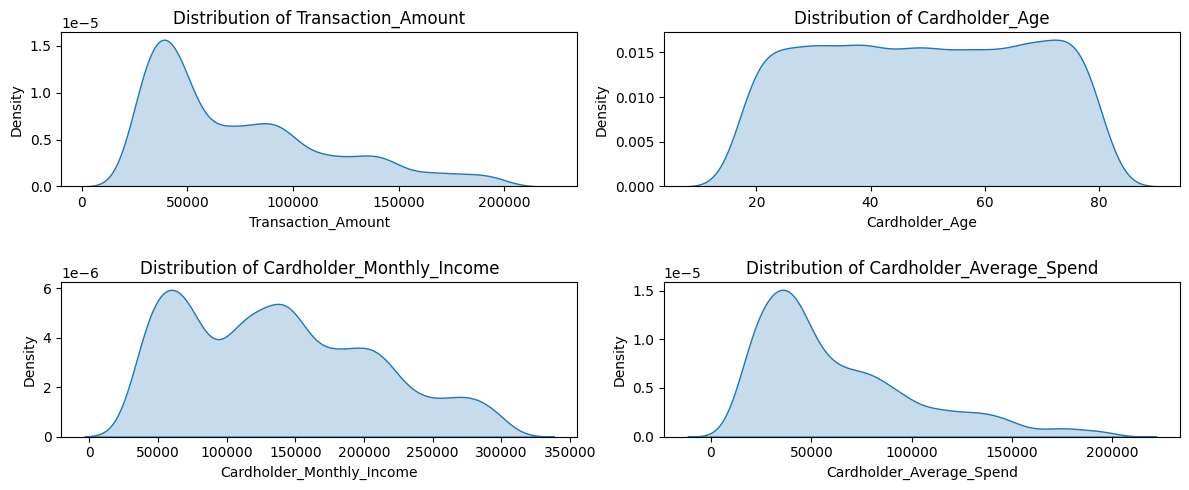

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 5)) # 2x2 = 4
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.kdeplot(data=df, x=col, ax=axes[i], fill=True).set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
df[numerical_cols].describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend
count,4994.000000,4865.000000,4686.000000,4792.000000
mean,74667.995995,49.106680,137353.817542,63058.343566
std,43089.045623,18.398524,69471.623020,40056.989704
min,25008.000000,18.000000,35005.000000,10282.410000
25%,39742.500000,33.000000,73485.000000,33336.742500
50%,60922.000000,49.000000,131833.000000,49547.945000
75%,98373.500000,65.000000,189054.250000,83732.352500
max,199923.000000,80.000000,299907.000000,199898.290000


In [ ]:
skewness = df[numerical_cols].skew()
skewness

,0
Transaction_Amount,0.968481
Cardholder_Age,-0.009025
Cardholder_Monthly_Income,0.428367
Cardholder_Average_Spend,1.155050


**c)** Conduct **bivariate and multivariate analysis** to identify potential relationships between the
features as well as with the target variable **(Is_Fraudulent).**

**Bivariate Analysis - Scatter Plot**

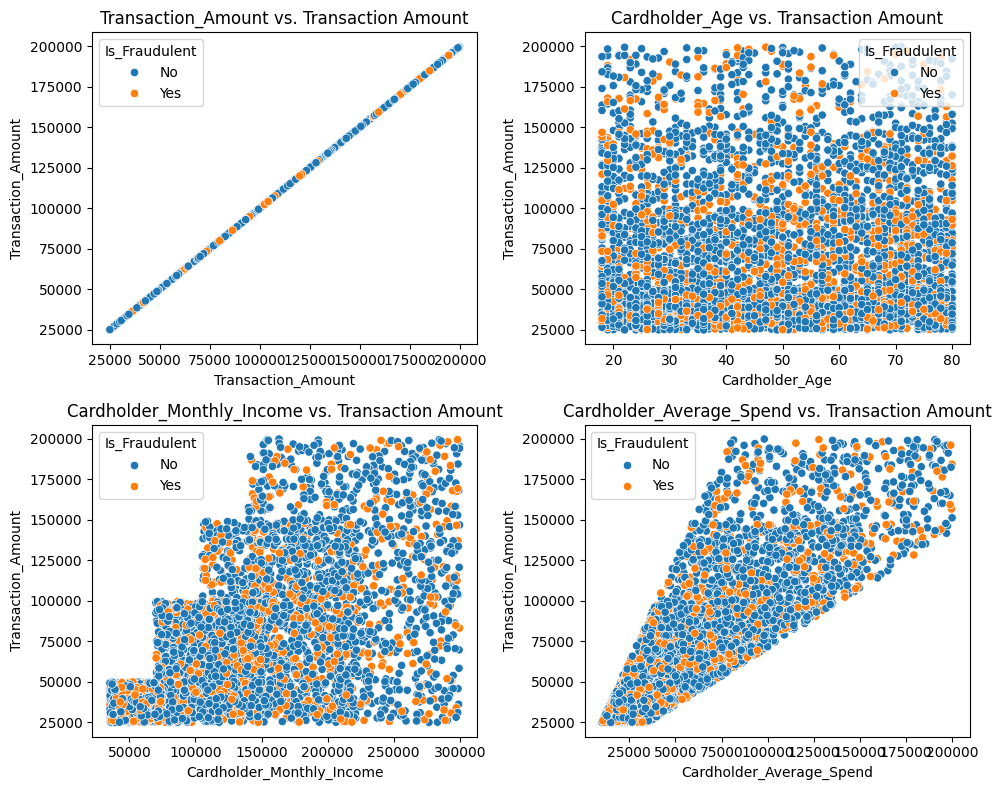

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:4]):  # Adjust the range if needed
    sns.scatterplot(data=df, x=col, y='Transaction_Amount', hue='Is_Fraudulent', ax=axes[i])
    axes[i].set_title(f'{col} vs. Transaction Amount')

plt.tight_layout()
plt.show()

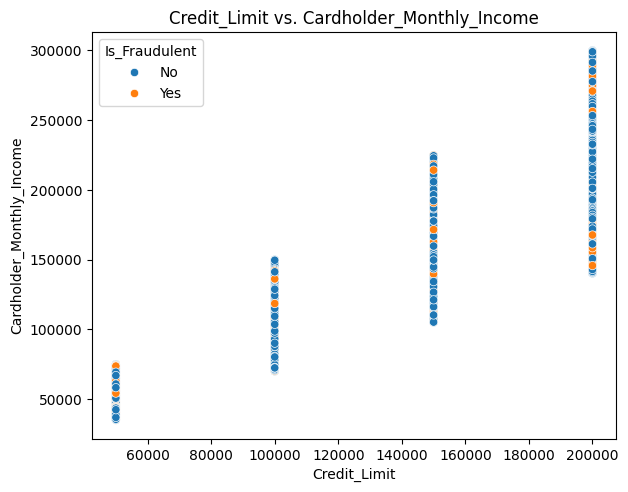

In [ ]:
sns.scatterplot(data=df, x='Credit_Limit', y='Cardholder_Monthly_Income', hue='Is_Fraudulent')
plt.tight_layout()
plt.title('Credit_Limit vs. Cardholder_Monthly_Income')
plt.show()

**Multivariate Analysis - Heatmap**

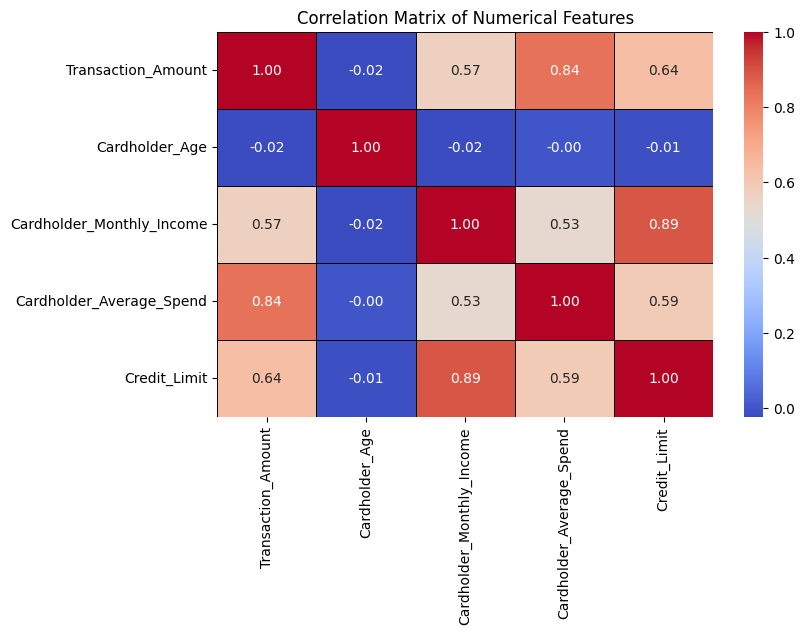

In [ ]:
correlation_matrix = df.corr(numeric_only=True)  # Include only numerical features
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**d)** Visualize the distribution of **transaction amounts** for **fraudulent vs. non-fraudulent**
transactions using **histograms or box plots.**


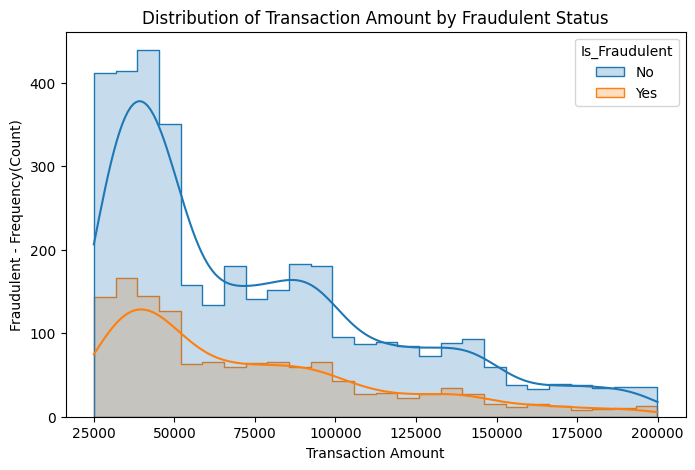

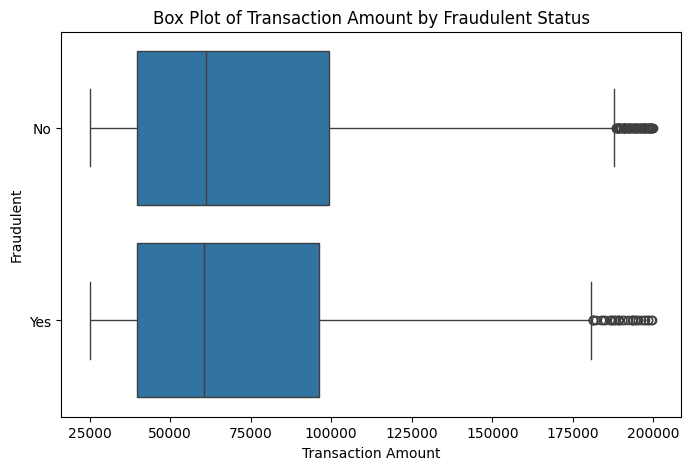

In [ ]:
# Visualize transaction amount distribution for fraudulent vs. non-fraudulent transactions
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Transaction_Amount', hue='Is_Fraudulent', kde=True, element="step")
plt.title('Distribution of Transaction Amount by Fraudulent Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Fraudulent - Frequency(Count)')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Transaction_Amount', y='Is_Fraudulent')
plt.title('Box Plot of Transaction Amount by Fraudulent Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Fraudulent')
plt.show()

**e)** Investigate whether certain features are more susceptible to fraud.

Based on the provided EDA, features showing potential susceptibility to fraud include:

* **Transaction Amount:**  High transaction amounts appear to have a higher likelihood of being fraudulent, as seen in the distribution and box plots.  Further analysis, perhaps using quantiles, could pinpoint specific thresholds.

* **Card Type, Merchant Category, and Location:**  The countplots for these categorical features might reveal specific card types, merchant categories, or locations with disproportionately higher fraud rates.  Analyzing the percentage of fraud within each category would be insightful.

* **Relationships between Numerical Features:** While the correlation matrix doesn't show strong linear relationships, the scatterplots of `Transaction_Amount` against other numerical features could reveal non-linear associations indicative of fraudulent patterns. For example, a specific range of `Cardholder_Age` combined with a certain `Transaction_Amount` might be a fraud indicator.  Further investigation of these interactions is needed.

* **Cardholder_Monthly_Income and Credit_Limit:**  The scatterplot of these features against each other shows some separation between fraudulent and non-fraudulent transactions, suggesting a possible link, though not a highly pronounced one.  More detailed analysis is needed to determine the strength of this association.




#**2) Data Preprocessing - Data Cleaning:**

**a)** Handle missing values if any, using appropriate techniques such as KNNImputer; mean or
median imputation for numerical features, and mode imputation for categorical features.


In [ ]:
df.isna().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [ ]:
categorical_null_counts=df[categorical_cols].isnull().sum()
categorical_null_counts[categorical_null_counts > 0]

,0
Card_Type,17
Merchant_Category,22
Cardholder_Gender,89
Device_Type,40


In [ ]:
for col in categorical_null_counts[categorical_null_counts > 0].index:
    print(f"{col}: \t {list(df[col].unique())}")

Card_Type: 	 ['Mastercard', 'American Express', 'Visa', 'RuPay', nan]
Merchant_Category: 	 ['Utility bill', 'Retail', 'Transportation', 'Online Shopping', 'Entertainment', 'Education', 'Dining', 'Healthcare', nan]
Cardholder_Gender: 	 ['Female', 'Male', nan]
Device_Type: 	 ['Unknown', 'Desktop', 'Mobile', 'Point-of-Sale Terminal', 'Contactless Payment Device', nan]


In [ ]:
for col in categorical_null_counts[categorical_null_counts > 0].index:
  df[col] = df[col].fillna(df[col].mode()[0]) # Mode Imputation for Categorical Columns

In [ ]:
df.isna().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,0
Cardholder_Monthly_Income,314


In [ ]:
numerical_cols=df.select_dtypes(exclude='O').columns
df[numerical_cols].isna().sum()

,0
Transaction_Amount,6
Cardholder_Age,135
Cardholder_Monthly_Income,314
Cardholder_Average_Spend,208
Credit_Limit,9


In [ ]:
for col in numerical_cols:
    print(f"{col}: \t {list(df[col].unique())}")

Transaction_Amount: 	 [27214.0, 83956.0, 193280.0, 167381.0, 81170.0, 131918.0, 139036.0, 49967.0, 44528.0, 29587.0, 63687.0, 184612.0, 33611.0, 50601.0, 41551.0, 88069.0, 40066.0, 48136.0, 28879.0, 36238.0, 142896.0, 49726.0, 131311.0, 55740.0, 49647.0, 65469.0, 48618.0, 51205.0, 124937.0, 186440.0, 60608.0, 40458.0, 31352.0, 44347.0, 82174.0, 118066.0, 37988.0, 95314.0, 97354.0, 31917.0, 74869.0, 126505.0, 50568.0, 126038.0, 67500.0, 38794.0, 99500.0, 65273.0, 40444.0, 142798.0, 51085.0, 129968.0, 69099.0, 40523.0, 34088.0, 112071.0, 50784.0, 84896.0, 81979.0, 94180.0, 77445.0, 34939.0, 95793.0, 78848.0, 87771.0, 87818.0, 50464.0, 50939.0, 83039.0, 34309.0, 75151.0, 29234.0, 98244.0, 30458.0, 42119.0, 49489.0, 47169.0, 115450.0, 89186.0, 31385.0, 52328.0, 88623.0, 49174.0, 68124.0, 101974.0, 28542.0, 44608.0, 46354.0, 34984.0, 49166.0, 109614.0, 190070.0, 164471.0, 107121.0, 63147.0, 26107.0, 36419.0, 27283.0, 34326.0, 96392.0, 42374.0, 31822.0, 197999.0, 86357.0, 37410.0, 33652.0, 1

In [ ]:
for col in numerical_cols:
  df[col] = df[col].fillna(df[col].median()) # Median Imputation for Numerical Columns

In [ ]:
df.isna().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,0
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,0
Cardholder_Gender,0
Cardholder_Monthly_Income,0


**b)** Check for outliers in **numerical features** using statistical methods like **Z-score or IQR**
**(Interquartile Range)** and remove them if necessary to ensure data quality.

**Remove outliers in numerical features using IQR** **(Interquartile Range)**


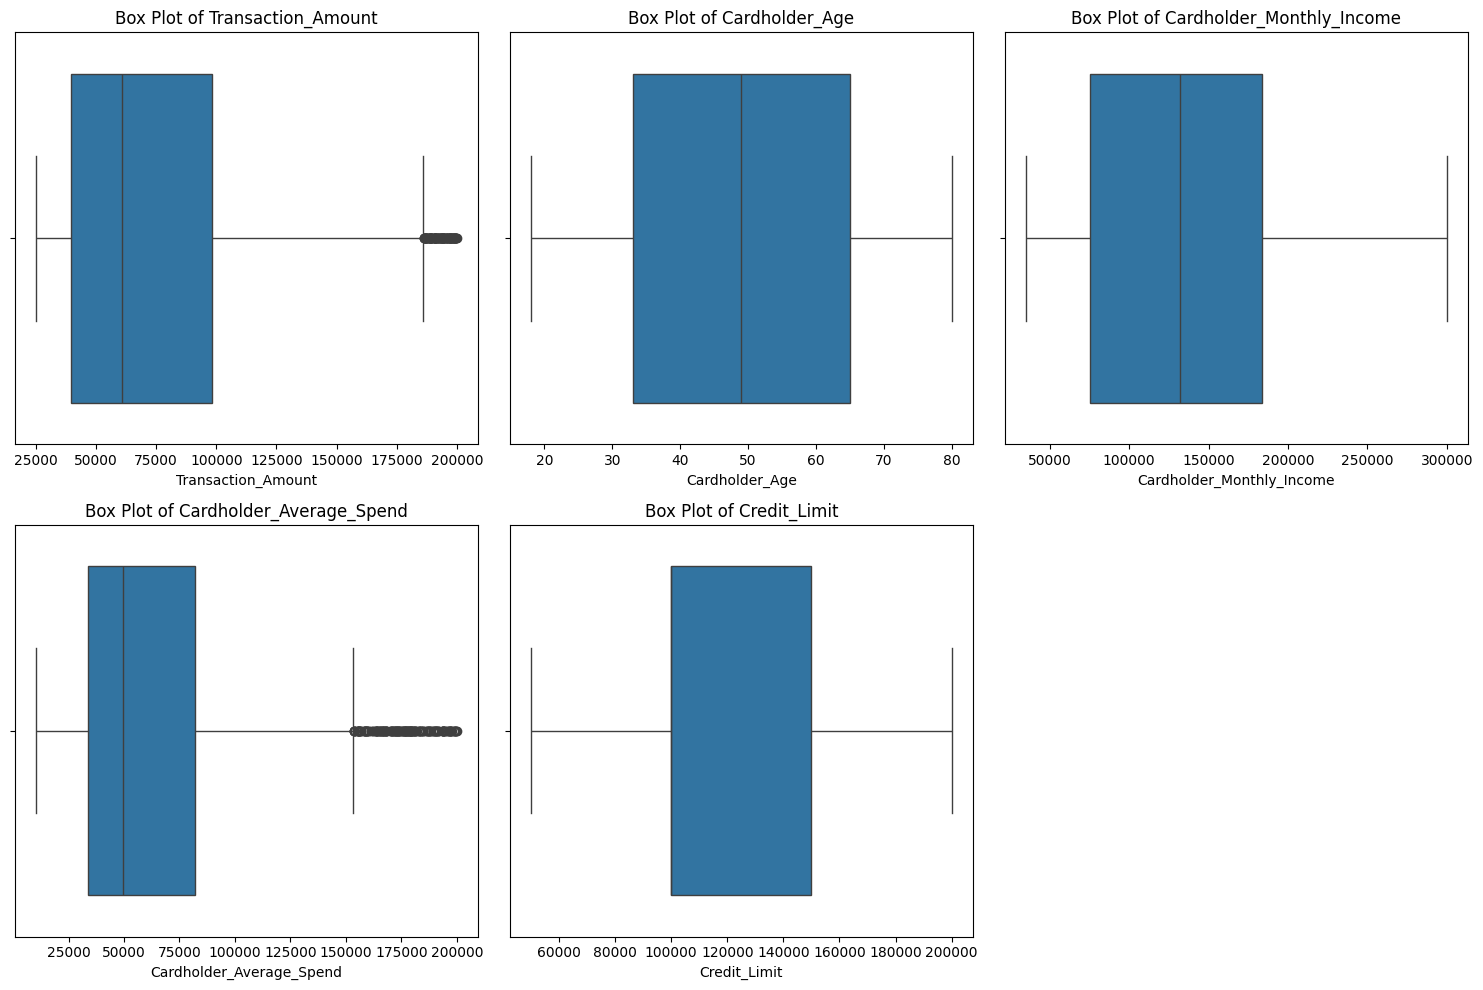

In [ ]:
# Create box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)  # Adjust the layout as needed
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
df[['Transaction_Amount', 'Cardholder_Average_Spend']].describe()

,Transaction_Amount,Cardholder_Average_Spend
count,5000.000000,5000.000000
mean,74651.500800,62496.310986
std,43065.809224,39307.481909
min,25008.000000,10282.410000
25%,39747.000000,33936.937500
50%,60922.000000,49547.945000
75%,98348.750000,81810.222500
max,199923.000000,199898.290000


In [ ]:
def remove_outliers_iqr(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df_filtered

for col in df[['Transaction_Amount', 'Cardholder_Average_Spend']]:
  df = remove_outliers_iqr(df, col)

In [ ]:
df.shape

(4746, 15)

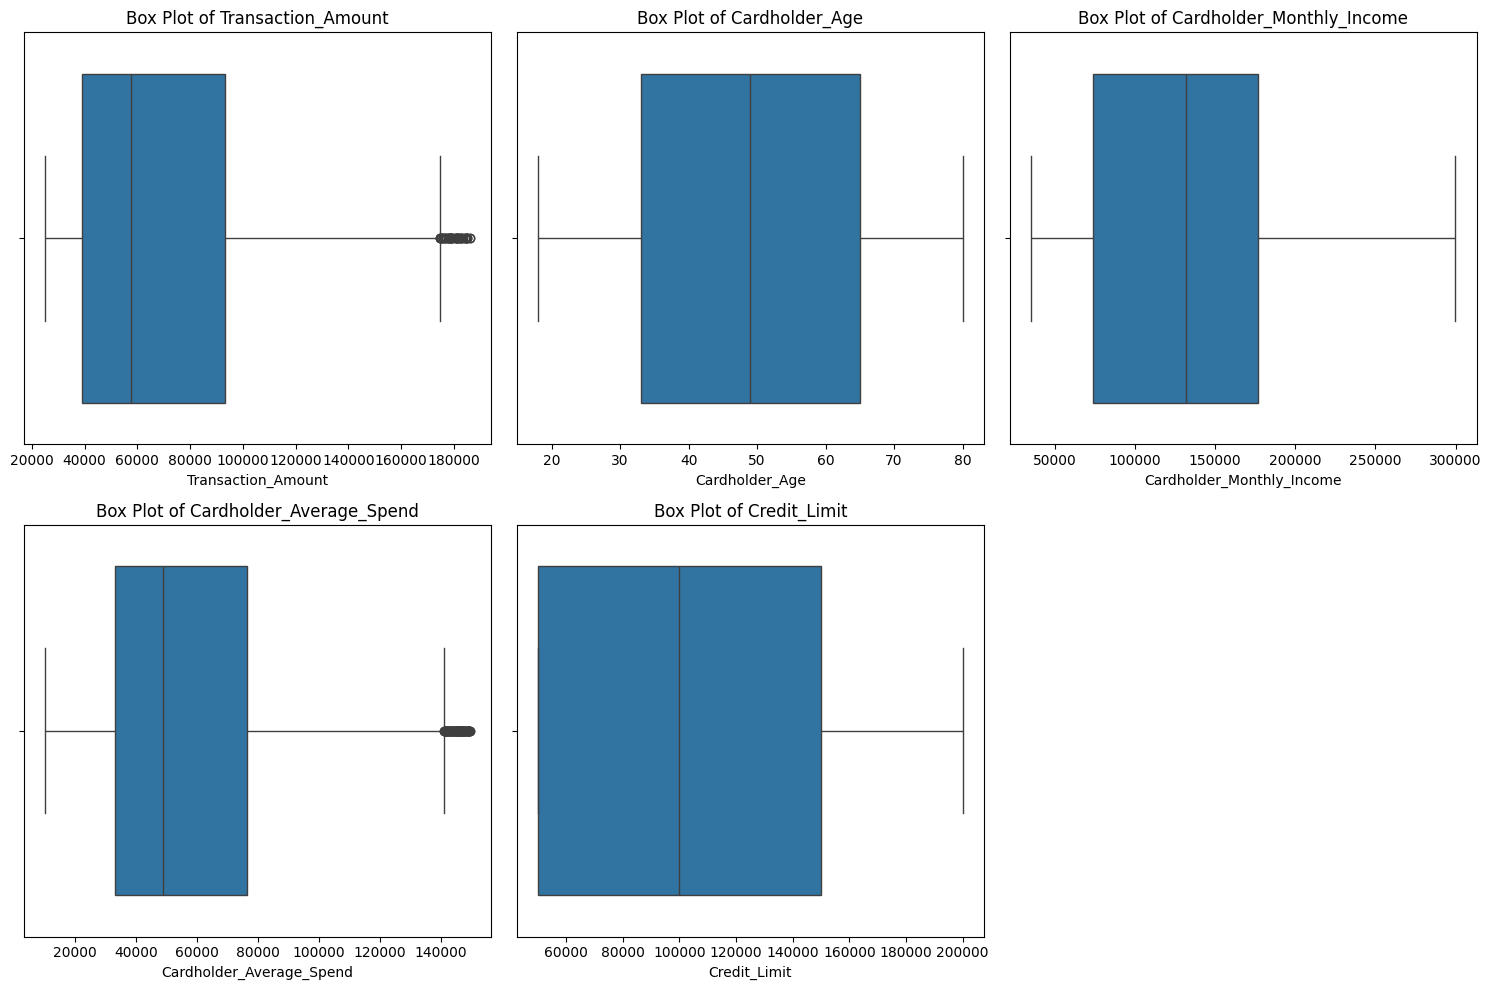

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(2, 3, i + 1)  # Adjust the layout as needed
  sns.boxplot(data=df, x=col)
  plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.figure_factory as ff

hist_data = [df['Transaction_Amount'], df['Cardholder_Average_Spend']]
group_labels = ['Transaction_Amount', 'Cardholder_Average_Spend']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig.show()

**c)** Assess skewness in numerical features by calculating the skewness score. If any features are
highly skewed, consider applying transformations such as **square root or log transformation**
to improve their distribution before scaling, if needed.

**Square root transformation to treat the skewed data**

In [ ]:
print('Skewness Score (after outlier removal)\n')
skewness_series = df[['Transaction_Amount', 'Cardholder_Average_Spend']].skew()
skewness_series.rename('Skewness_Score', inplace=True) # Rename the series
skewness_series

Skewness Score (after outlier removal)



,Skewness_Score
Transaction_Amount,0.935180
Cardholder_Average_Spend,0.950315


In [ ]:
hist_data = [df['Transaction_Amount'].apply(lambda x: x**0.5).tolist(), df['Cardholder_Average_Spend'].apply(lambda x: x**0.5).tolist()]
group_labels = ['Transaction_Amount', 'Cardholder_Average_Spend']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig.show()

In [ ]:
from scipy.stats import skew

# Calculate skewness for the transformed data
skewness_transformed = pd.Series(skew(hist_data[0]), index=['Transaction_Amount'])
# Use pandas.concat instead of append
skewness_transformed = pd.concat([skewness_transformed, pd.Series(skew(hist_data[1]), index=['Cardholder_Average_Spend'])])

print("Skewness after square root transformation:\n")

# Create a DataFrame from the skewness_transformed Series
skewness_df = pd.DataFrame(skewness_transformed, columns=['Skewness_Score_Transformed'])
skewness_df

Skewness after square root transformation:



,Skewness_Score_Transformed
Transaction_Amount,0.558661
Cardholder_Average_Spend,0.464879


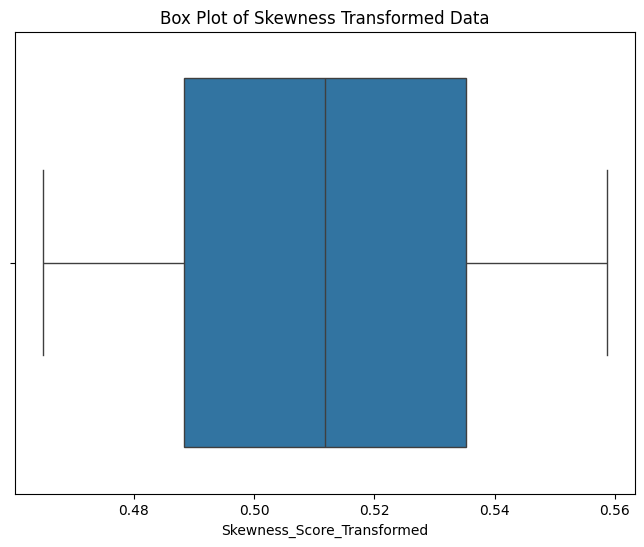

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=skewness_transformed)
plt.title('Box Plot of Skewness Transformed Data')
plt.xlabel('Skewness_Score_Transformed')
plt.show()

#**3) Feature Engineering:**
**a)** Identify the categorical features in the dataset.

In [ ]:
df[categorical_cols].info() # the categorical features in the dataset.

<class 'pandas.core.frame.DataFrame'>
Index: 4746 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Card_Type          4746 non-null   object
 1   Merchant_Category  4746 non-null   object
 2   Location           4746 non-null   object
 3   Region             4746 non-null   object
 4   Cardholder_Gender  4746 non-null   object
 5   Device_Type        4746 non-null   object
 6   Day_of_Week        4746 non-null   object
 7   Is_Fraudulent      4746 non-null   object
dtypes: object(8)
memory usage: 333.7+ KB


**b)** Encode categorical features to numerical using techniques like one-hot encoding or label
encoding techniques to prepare the data for machine learning algorithms.

**Label Encoding Technique**


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoders = {col: LabelEncoder() for col in categorical_cols}

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,1,7,27214.0,2020-01-01 09:43:17,10,0,23.0,0,94632.0,36369.65,100000.0,4,6,0
1,V606KV56,0,5,83956.0,2020-01-03 16:26:13,12,3,49.0,1,148118.0,89179.12,150000.0,1,0,0
4,K256ZN73,2,5,81170.0,2020-01-04 17:26:47,8,1,37.0,0,174470.0,52713.09,200000.0,2,2,0
5,I812SG19,2,2,131918.0,2020-01-04 19:55:12,9,3,80.0,1,166671.0,80393.44,150000.0,3,2,0
6,Y182UO40,3,5,139036.0,2020-01-05 16:33:10,12,3,33.0,1,171991.0,84215.74,150000.0,1,3,1


#**4) Feature Selection:**
**a)** Select relevant features that have the most impact on predicting fraudulent transactions.

                      Feature  Importance
2          Transaction_Amount    0.158237
8    Cardholder_Average_Spend    0.155698
7   Cardholder_Monthly_Income    0.153762
5              Cardholder_Age    0.132412
1           Merchant_Category    0.073389
11                Day_of_Week    0.070344
3                    Location    0.070056
10                Device_Type    0.056362
0                   Card_Type    0.043883
4                      Region    0.031984
9                Credit_Limit    0.030787
6           Cardholder_Gender    0.023085


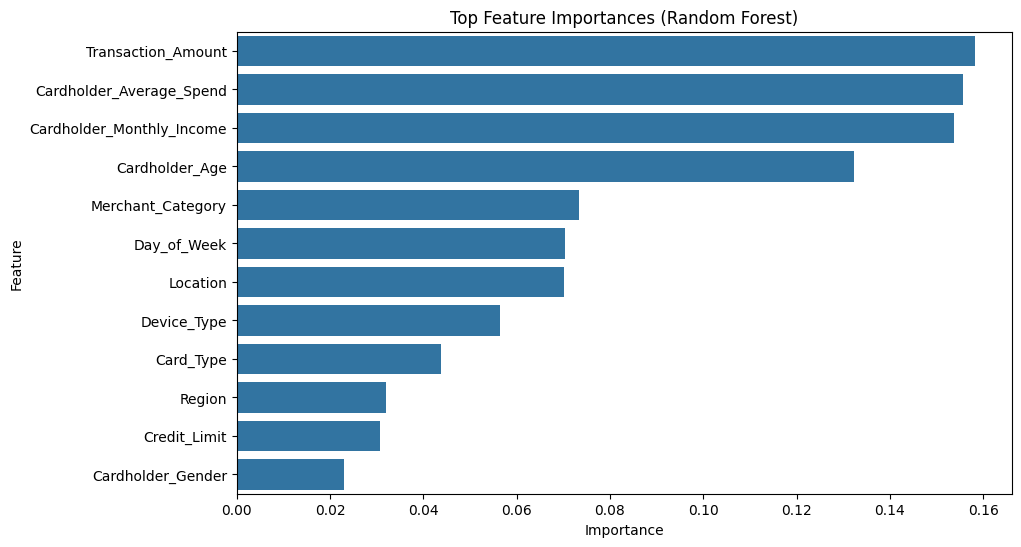

In [ ]:
# Feature Importance using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Separate features (X) and target variable (y)
X = df.drop(['Transaction_ID','Transaction_DateTime', 'Is_Fraudulent'], axis=1)
y = df['Is_Fraudulent']

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N important features
N = 12
print(feature_importance_df.head(N))

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(N))
plt.title('Top Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**b)** Identify and remove redundant or irrelevant features that do not contribute significantly to
the prediction task.

In [ ]:
X.columns # These are my Features X

Index(['Card_Type', 'Merchant_Category', 'Transaction_Amount', 'Location',
       'Region', 'Cardholder_Age', 'Cardholder_Gender',
       'Cardholder_Monthly_Income', 'Cardholder_Average_Spend', 'Credit_Limit',
       'Device_Type', 'Day_of_Week'],
      dtype='object')

By carefully identifying **'Transaction_ID',**
 **'Transaction_DateTime'** are the irrelevant features that do not contribute significantly to the prediction task - **'Is_Fraudulent' (Target - y)**

#**5) Split data into training and testing:**

**a)** Divide the dataset into training and testing sets to evaluate the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

**b)** Ensure that both sets maintain the same distribution of fraudulent and non-fraudulent
transactions to avoid data leakage.

In [ ]:
# Check the distribution of the target variable in the original dataset
print(df['Is_Fraudulent'].value_counts(normalize=True))

# Use stratify parameter in train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the distribution in the training and testing sets
print("\nTraining set distribution:")
print(y_train.value_counts(normalize=True))
print("\nTesting set distribution:")
print(y_test.value_counts(normalize=True))

Is_Fraudulent
0    0.733881
1    0.266119
Name: proportion, dtype: float64

Training set distribution:
Is_Fraudulent
0    0.732086
1    0.267914
Name: proportion, dtype: float64

Testing set distribution:
Is_Fraudulent
0    0.741053
1    0.258947
Name: proportion, dtype: float64


#**6) Feature Scaling:**

**a)** Scale numerical features to ensure that they have the same magnitude, preventing some
features from dominating others during model training.

**b)** Common scaling techniques include Min-Max scaling or Standardization (Z-score
normalization).

**Scaling Techniques - Standardization (Z-score** **normalization)**

In [ ]:
df[numerical_cols].head()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
0,27214.0,23.0,94632.0,36369.65,100000.0
1,83956.0,49.0,148118.0,89179.12,150000.0
4,81170.0,37.0,174470.0,52713.09,200000.0
5,131918.0,80.0,166671.0,80393.44,150000.0
6,139036.0,33.0,171991.0,84215.74,150000.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'numerical_cols' contains the names of your numerical features
numerical_cols_to_scale = numerical_cols

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])

# Transform the testing data (using the same scaler fitted on the training data)
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

In [ ]:
X_train[numerical_cols_to_scale].head()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
2105,-0.459998,-1.559788,0.042006,-0.131028,0.539524
1580,-0.366975,-1.504834,0.000709,0.322019,-0.384262
2914,0.494112,1.132954,1.688955,0.312686,1.463310
1428,0.759832,-1.669696,-0.564622,0.620271,-0.384262
1963,-1.033621,-1.614742,1.487629,-1.031694,1.463310


In [ ]:
X_test[numerical_cols_to_scale].head()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
1653,0.449958,-0.021078,1.006224,-0.240105,1.463310
3327,-0.674770,-0.955295,-0.096662,-0.001338,-0.384262
572,1.167473,-0.350802,1.268662,-0.240105,1.463310
2769,-0.792629,0.033876,-0.787539,-0.719636,-0.384262
4653,2.369690,-0.350802,2.499697,2.162279,1.463310


#**7) Build the Machine Learning Model:**

**a)** Import the necessary modules and libraries for building and evaluating machine learning
models.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

import warnings

warnings.filterwarnings("ignore")

**b)** Define a list or **dictionary of classifiers** to be evaluated; including **Logistic Regression, Naive**
**Bayes, Decision Tree, Random Forest, K-Nearest Neighbors, and SVM.** Then, compute the
**accuracy score and F1-score** for each **classifier.**

In [ ]:
# Dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC()
}

# Initialize an empty dictionary to store the results
results = {}

# Iterate through classifiers
for name, clf in classifiers.items():
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # Calculate metrics
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  # Store the results
  results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results).T
results_df

,Accuracy,F1 Score
Logistic Regression,0.741053,0.000000
Gaussian Naive Bayes,0.741053,0.000000
Decision Tree,0.597895,0.253906
Random Forest,0.736842,0.015748
K-Nearest Neighbors,0.680000,0.182796
Support Vector Classifier,0.741053,0.000000


In [ ]:
# Find the classifier with the highest accuracy
best_classifier_accuracy = results_df['Accuracy'].idxmax()
print(f"The best classifier based on accuracy is: {best_classifier_accuracy} with the highest accuracy is {round(results_df.loc[best_classifier_accuracy, 'Accuracy'], 6)}")

# Find the classifier with the highest F1-score
best_classifier = results_df['F1 Score'].idxmax()
print(f"\nThe best classifier based on F1-score is: {best_classifier} with the highest F1-score is {round(results_df.loc[best_classifier, 'F1 Score'], 6)}")

The best classifier based on accuracy is: Logistic Regression with the highest accuracy is 0.741053

The best classifier based on F1-score is: Decision Tree with the highest F1-score is 0.253906


**c)** Select a machine learning algorithm for binary
classification with the highest accuracy or
F1-score from the above step.

**Binary Classification - Logistic Regression with the highest accuracy**

In [ ]:
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

**d)** Train the selected model using the training dataset and evaluate its performance using
appropriate metrics like **confusion matrix, accuracy, precision, recall, and F1-score.**

Confusion Matrix:
 [[704   0]
 [246   0]]


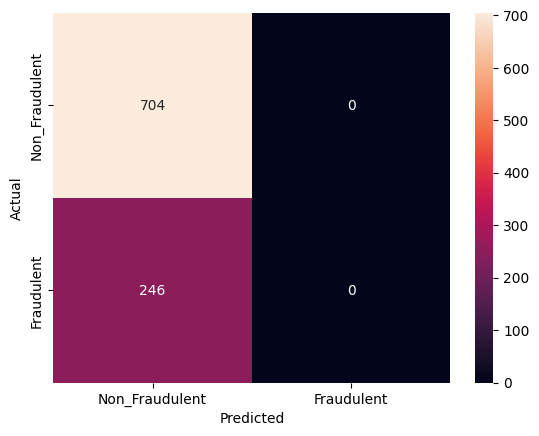


Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       704
           1       0.00      0.00      0.00       246

    accuracy                           0.74       950
   macro avg       0.37      0.50      0.43       950
weighted avg       0.55      0.74      0.63       950



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

labels = ['Non_Fraudulent', 'Fraudulent']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report (includes accuracy, precision, recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=4)

# Print header
print(f"{'Classifier':<25} {'Mean Accuracy':<20} {'Mean F1 Score':<20}\n")

# Iterate through classifiers and perform cross-validation
for name, clf in classifiers.items():
    accuracy_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
    f1_scores = cross_val_score(clf, X, y, cv=kf, scoring='f1_weighted')
    print(f"{name:<25} {accuracy_scores.mean():<20.4f} {f1_scores.mean():<20.4f}")

Classifier                Mean Accuracy        Mean F1 Score       

Logistic Regression       0.7339               0.6213              
Gaussian Naive Bayes      0.7339               0.6213              
Decision Tree             0.5995               0.6076              
Random Forest             0.7318               0.6237              
K-Nearest Neighbors       0.6810               0.6344              
Support Vector Classifier 0.7339               0.6213              


**e)** Validate the model's performance on the testing dataset and interpret the results to assess
its effectiveness in detecting fraudulent transactions.

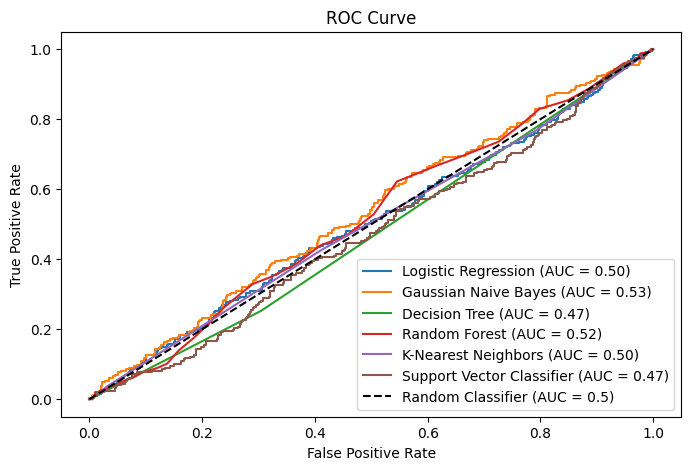

In [ ]:
plt.figure(figsize=(8, 5))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_probs = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.5)') # Plot diagonal line (random model)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

#**Model Performance Analysis: Credit Card Fraud Detection**

## **1. Performance Overview**
### **Accuracy:**
- Accuracy values (e.g., **73.39% for Logistic Regression, Random Forest**) show the proportion of total correct predictions.
- **Limitation:** In imbalanced datasets, accuracy is unreliable because the majority class (non-fraudulent) dominates predictions.

### **F1-Score:**
- Most models have **F1-scores close to 0** (e.g., **0 for Logistic Regression and Support Vector Classifier**), indicating that the models fail to balance precision and recall for fraudulent transactions.

### **Confusion Matrix:**
- **Non-Fraudulent Transactions (704):** Perfectly classified (all true positives).
- **Fraudulent Transactions (246):** Completely missed (all false negatives).

### **Classification Report:**
- **Precision for Fraudulent Class (1):** **0.00** — Models fail to correctly predict any fraudulent transactions.
- **Recall for Fraudulent Class (1):** **0.00** — None of the actual fraud cases are detected.
- **Macro Average F1-Score (0.43)** and **Weighted Average F1-Score (0.63)** reflect severe imbalances in prediction.

### **AUC-ROC:**
- AUC scores for most classifiers hover around **0.5**, which is equivalent to random guessing. This confirms that the models are ineffective at distinguishing fraud from non-fraud cases.

---

## **2. Key Observations**
1. **Class Imbalance Problem:**
   - The models are biased towards the majority class (non-fraudulent) and fail to generalize for the minority class (fraudulent).
   - Fraudulent transactions have low support (246 cases), leading to poor detection.

2. **Precision-Recall Trade-Off:**
   - Classifiers prioritize maximizing accuracy by predicting the majority class, neglecting the minority class.
   - **F1-score of 0** indicates that none of the models achieve a balance between precision and recall for fraud detection.

3. **Model Limitation:**
   - Without addressing class imbalance and tuning decision thresholds, the models’ performance remains inadequate.
